# Thyroid Cancer Recurrence Detection Model

# Introduction

Thyroid cancer is one of the most common endocrine malignancies, with a steadily increasing global incidence over the past few decades. While the majority of thyroid cancers are well-differentiated and have favorable prognoses with effective treatment options, a significant proportion of patients experience recurrence.

Recurrent thyroid cancer poses challenges in clinical management, leading to potential complications such as diminished quality of life, increased healthcare costs, and, in severe cases, a higher risk of mortality. Early identification of patients at high risk for recurrence is crucial for timely intervention, personalized treatment, and improved outcomes.

# Building a model

Developing robust ML models for thyroid cancer recurrence not only enhances the precision of prognostication but also contributes to reducing unnecessary interventions for low-risk patients, ultimately improving patient outcomes and resource allocation. As the prevalence of thyroid cancer continues to rise, the integration of machine learning into its management represents a critical step toward the future of precision oncology.

# Aim


This work aims to enhance the likelihood of early detection of recurrence. Understanding their risk of recurrence empowers patients to make informed lifestyle adjustments and maintain appropriate follow-up with their healthcare providers.

In [61]:
#importing necessary Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', None)

In [62]:
# Loading the dataset
df = pd.read_csv("Thyroid_Diff.csv")

In [63]:
# Show the first 5 rows
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [191]:
df['Response'].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

## **Features and Meaning**

Age: Represents the age of individuals in the dataset.

Gender: Indicates the gender of individuals (e.g., Male or Female).

Smoking: Possibly an attribute related to smoking behavior.

Smoking History: Indicates whether individuals have a history of smoking (e.g., Yes or No).

Radiotherapy History: Indicates whether individuals have a history of radiotherapy treatment (e.g., Yes or No).

Thyroid Function: Possibly indicates the status or function of the thyroid gland.

Physical Examination: Describes the results of a physical examination, likely related to the thyroid.

Adenopathy: Indicates the presence and location of adenopathy (enlarged lymph nodes).

Types of Thyroid Cancer (Pathology): Describes the types of thyroid cancer based on pathology examinations, including specific subtypes like "Micropapillary Papillary," "Follicular," and "Hürthle cell."

Focality: Indicates whether the thyroid cancer is unifocal or multifocal.

Risk: Represents the risk category associated with thyroid cancer.

Tumor: Represents the T (Tumor) stage of thyroid cancer, indicating the size and extent of the primary tumor.

Lymph Nodes: Represents the N (Node) stage of thyroid cancer, indicating the involvement of nearby lymph nodes.

Cancer Metastasis: Represents the M (Metastasis) stage of thyroid cancer, indicating whether the cancer has spread to distant organs.

Stage: Represents the overall stage of thyroid cancer based on the combination of T, N, and M stages.

Treatment Response: Describes the response to treatment, including categories such as 'Indeterminate,' 'Excellent,' 'Structural Incomplete,' and 'Biochemical Incomplete.'

Recurred: Indicates whether thyroid cancer has recurred (e.g., Yes or No)

## **Data Preprocessing**

In [67]:
# Handling Missing Values
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


In [69]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [70]:
# checking for duplicates
df.duplicated().sum()

19

In [71]:
# remvoing duplicates
df.drop_duplicates(inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


From my dataset it could be seen i have only one numerical value (Age). I will need to encode all my categorical values

## **Analysing Features**

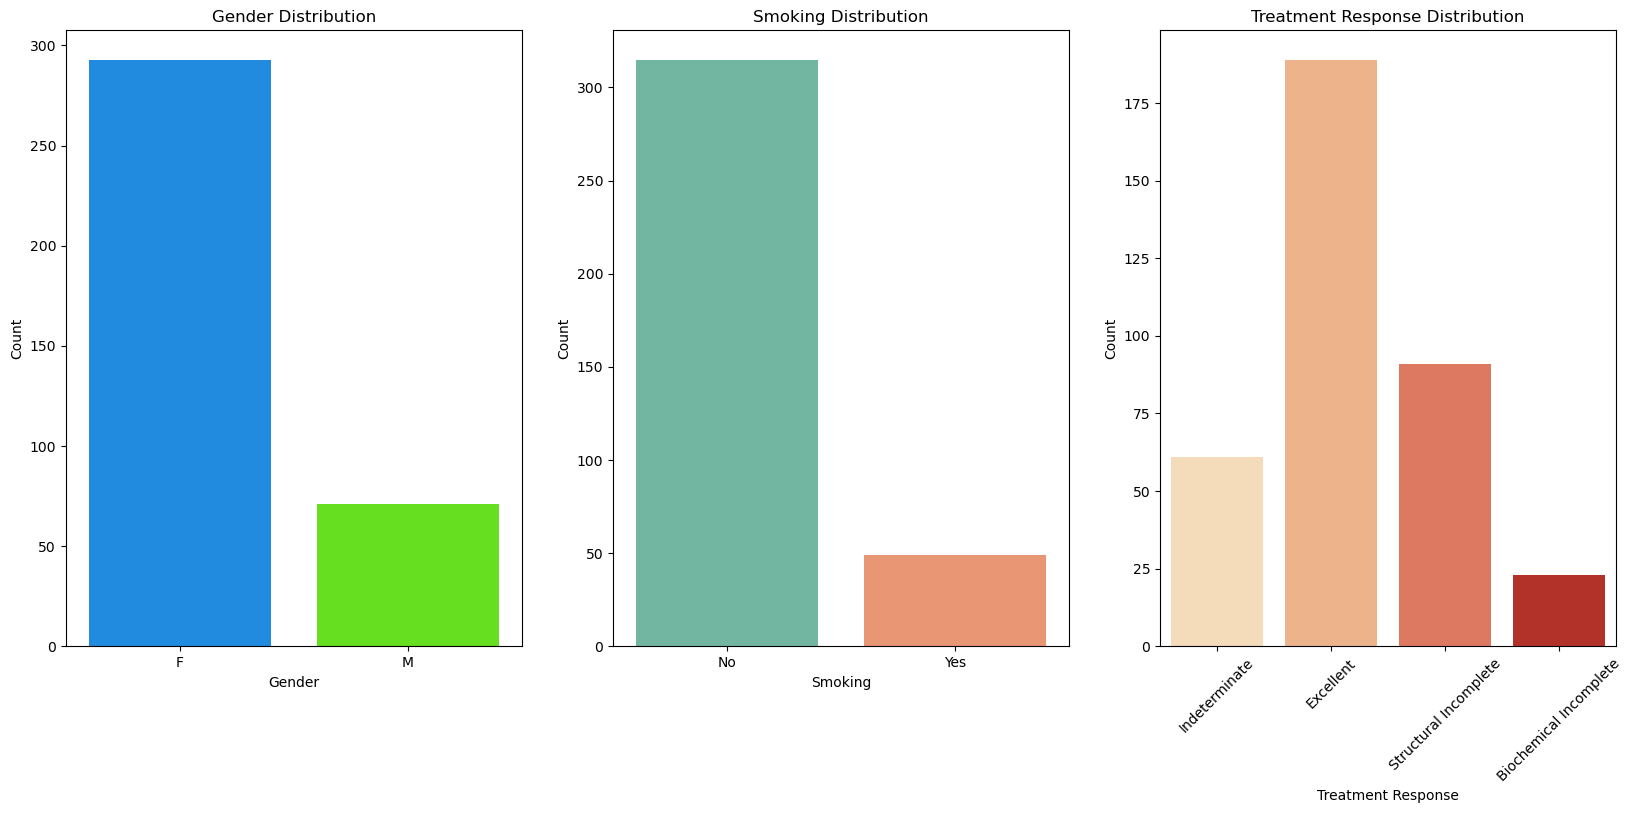

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(x='Gender', data=df, palette='gist_rainbow_r', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='Smoking', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Smoking Distribution')
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Count')

sns.countplot(x='Response', data=df, palette='OrRd',  ax=axes[2])
axes[2].set_title('Treatment Response Distribution')
axes[2].set_xlabel('Treatment Response')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
plt.show()

## **Insights**



1.   From the above plot we conclude that the majority of people who has a thyroid Cancer are Female
2.   The Smoking doesnt affect on the thyroid cancer
3.  Rate of recovery from the Thyroid cancer are very large



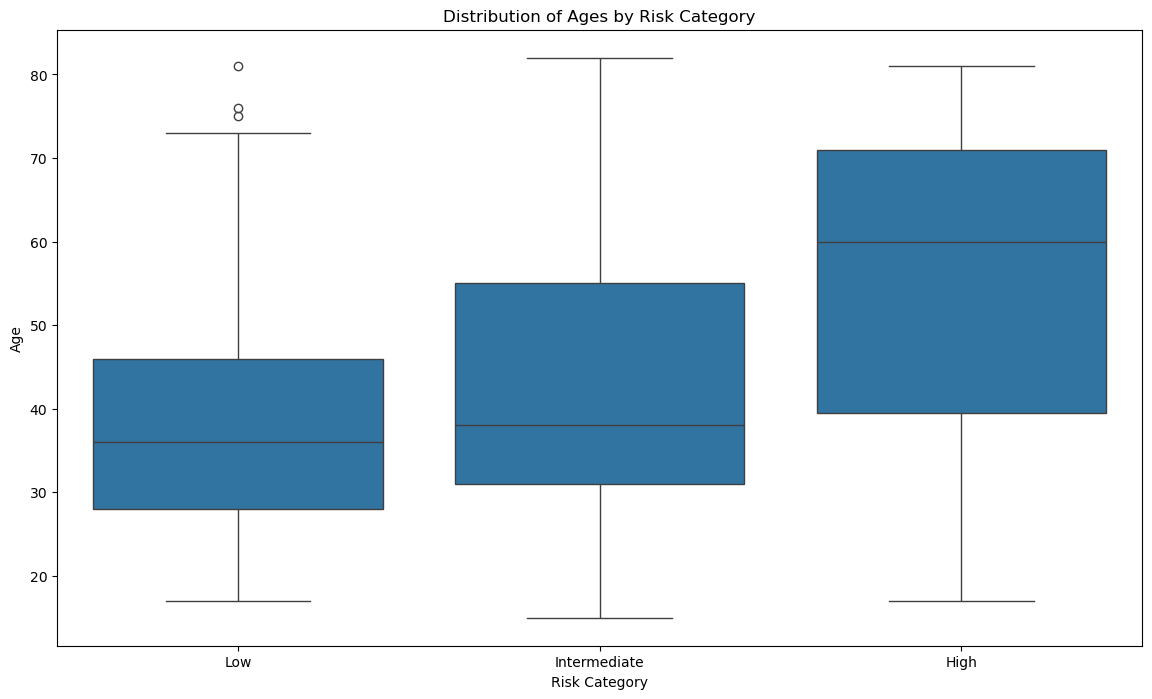

In [78]:
#How Age varied across Risk and its relationship

plt.figure(figsize=(14, 8))
sns.boxplot(x='Risk', y='Age', data=df)
plt.title('Distribution of Ages by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Age')
plt.show()

# **Insights**

Here you can see there is relationship between Age and Risk. Older the individual is risk to Thyroid Cancer.

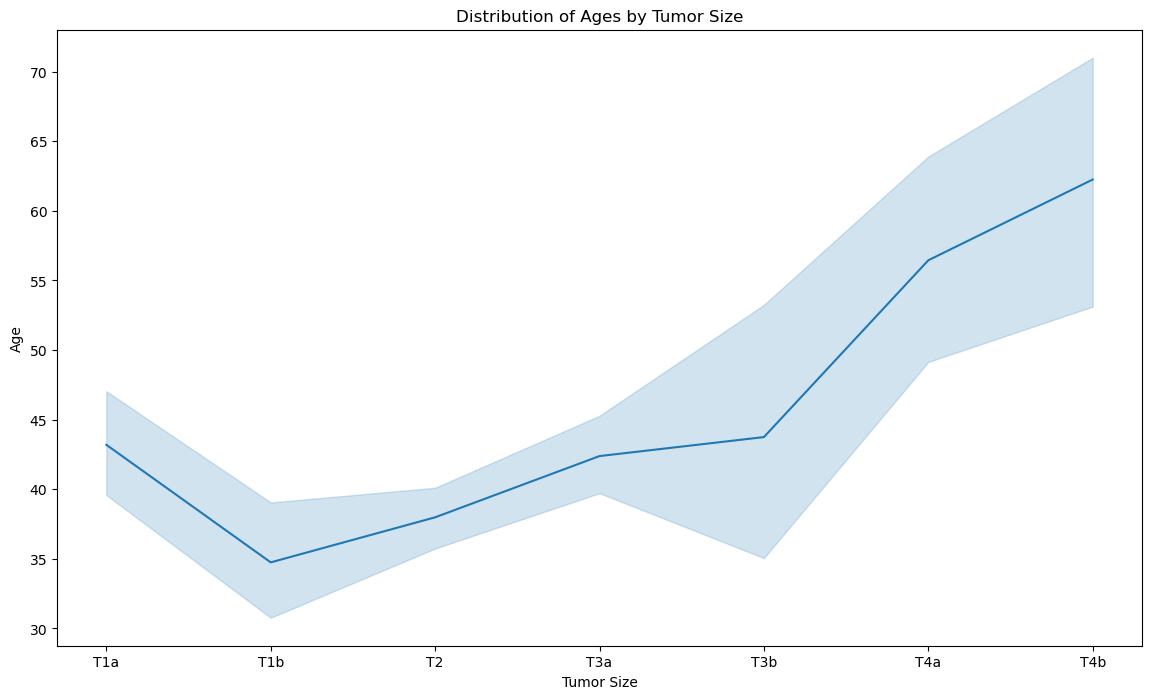

In [81]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='T', y='Age', data=df)
plt.title('Distribution of Ages by Tumor Size')
plt.xlabel('Tumor Size')
plt.ylabel('Age')
plt.show()

The higher the age, the higher the tumor size, I can say there is a relationship.

# Feature Engineering

In [84]:
df.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000


### Engineering Age Class

In [86]:
82 -15

67

In [87]:
67/10

6.7

In [88]:
15 + 10

25

In [89]:
25 + 10

35

In [90]:
35 + 10

45

In [91]:
45+10

55

In [92]:
55 + 10

65

In [93]:
65 + 10

75

In [94]:
def age_class(x):
    if 15 <= x <= 25:
        return 1
    elif 26 <= x <= 35:
        return 2
    elif 36 <= x <= 45:
        return 3
    elif 46 <= x <= 55:
        return 4
    elif 56 <= x <= 65:
        return 5
    elif 66 <= x <= 75:
        return 6
    elif 76 <= x <= 85:
        return 7

In [95]:
df2 = df.copy()

In [96]:
df2['categorized_age'] = df2['Age'].apply(age_class)

In [97]:
df2

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,categorized_age
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,2
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,2
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,2
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,5
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes,6
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,7
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,6
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,5


<Axes: xlabel='Age'>

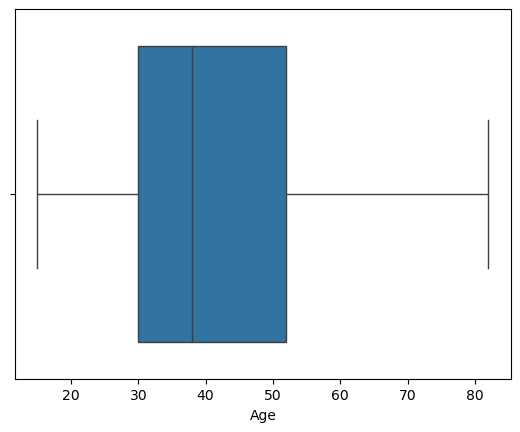

In [98]:
sns.boxplot(x='Age', data=df2)

## Feature Scaling

In [100]:
# using a standard scaler on the numerical column (age) before I encode the categorical columns
from sklearn.preprocessing import StandardScaler

Standard_Scaler = StandardScaler()
scaled_age = Standard_Scaler.fit_transform(df2[['Age']])
scaled_age

array([[-0.93178003],
       [-0.47406352],
       [-0.73561581],
       [ 1.3568025 ],
       [ 1.3568025 ],
       [ 0.70292178],
       [-0.01634702],
       [ 0.31059334],
       [ 0.63753371],
       [-0.08173509],
       [ 2.20684744],
       [ 1.16063828],
       [ 0.50675756],
       [ 0.57214563],
       [ 2.27223551],
       [ 0.04904105],
       [-0.08173509],
       [ 0.1798172 ],
       [ 0.11442913],
       [ 0.70292178],
       [-0.01634702],
       [ 0.1798172 ],
       [-0.34328738],
       [ 1.87990708],
       [ 1.22602636],
       [-0.5394516 ],
       [ 0.11442913],
       [-0.9971681 ],
       [-0.01634702],
       [-0.27789931],
       [-0.27789931],
       [-0.73561581],
       [ 0.899086  ],
       [ 0.70292178],
       [-0.27789931],
       [-0.67022774],
       [ 0.11442913],
       [-0.47406352],
       [ 0.24520527],
       [-1.38949654],
       [-0.21251124],
       [-0.21251124],
       [-0.5394516 ],
       [-0.67022774],
       [-0.67022774],
       [-0

The idea of scaling age is to reduce dominance of large values; Age varies greatly across individuals, and large age values can dominate the model, leading to poor performance on smaller age values

<Axes: >

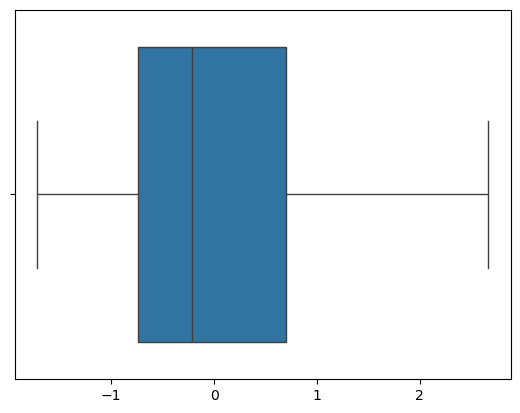

In [102]:
sns.boxplot(x=scaled_age.flatten())

In [103]:
df3 = df2.copy()

In [104]:
df3['scaled_age'] = scaled_age

In [105]:
df3.drop(columns=['Age'], inplace=True)

## Splitting the datasets into train and test set

In [107]:
X = df3.drop(columns=['Recurred'])
y = df3['Recurred']

print(X.shape)
print(y.shape)

(364, 17)
(364,)


In [108]:
# splitting our dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [109]:
X.head()

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,categorized_age,scaled_age
0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,2,-0.931780
1,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,2,-0.474064
2,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,2,-0.735616
3,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,5,1.356803
4,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,5,1.356803


In [110]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

# Encoding the categorical values

In [112]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [118]:
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

object_columns = X_train.select_dtypes(include=['object']).columns
for column in object_columns:
    X_train[column] = encoder.fit_transform(X_train[column]) #encoder to convert categorical data to numeric value

object_columns = X_test.select_dtypes(include=['object']).columns
for column in object_columns:
    X_test[column] = encoder.fit_transform(X_test[column])  #encoder to convert categorical data to numeric value

In [120]:
X_train.head()

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,categorized_age,scaled_age
351,1,1,1,0,1,1,3,1,0,1,4,0,0,0,3,5,1.160638
320,0,1,0,0,2,4,5,3,0,1,3,2,0,1,3,7,2.533788
109,0,0,0,0,2,4,3,3,1,2,2,0,0,0,0,5,1.226026
49,0,0,0,0,2,1,3,0,1,2,1,0,0,0,1,2,-0.801004
245,0,0,0,0,2,1,0,3,1,1,3,2,0,0,2,2,-0.474064


In [121]:
X_train.shape

(291, 17)

In [122]:
y_train.shape

(291,)

## Feature Importance

Identifying the most important features for predicting the target variable (Recurred) in my dataset using Feature Importance and Permutation Importance.

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'xgboost'

In [128]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
rf_model.fit(X_train, y_train)

# view the feature scores
feature_scores = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Response                0.364520
Risk                    0.164375
N                       0.103357
T                       0.077289
Adenopathy              0.056030
scaled_age              0.054135
Stage                   0.040231
categorized_age         0.027488
Physical Examination    0.021620
Focality                0.019297
Thyroid Function        0.018345
Gender                  0.016252
Smoking                 0.013941
M                       0.011010
Pathology               0.009592
Hx Smoking              0.002012
Hx Radiothreapy         0.000507
dtype: float64

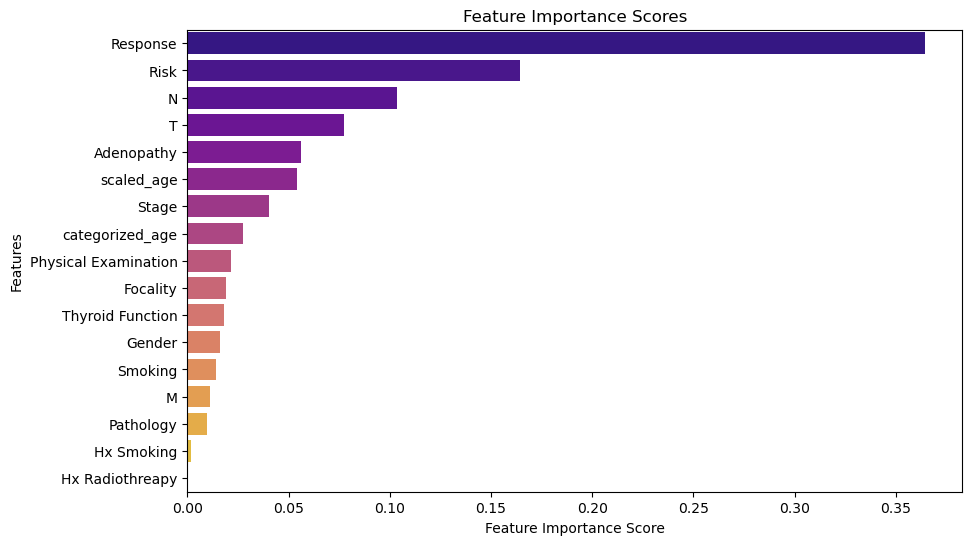

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores.values, y=feature_scores.index, palette="plasma")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

Response is the most important feature, by far, for predicting the recurrence of thyroid cancer.

## **Handling Imbalance Problems**

In [132]:
y_train.shape

(291,)

In [134]:
pd.Series(y_train).value_counts()

0    205
1     86
Name: count, dtype: int64

There is a noticeable class imbalance in my y_train data. The majority class (represented by 'No Recurrence', encoded as 0) has 205 instances, while the minority class (represented by 'Recurrence', encoded as 1) has only 86 instances. This means my dataset has about 70% of the majority class and 30% of the minority class.

In [136]:
from imblearn.over_sampling import SMOTE

In [138]:
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X_train, y_train)

print(y_train.shape, y_sampled.shape)

(291,) (410,)


In [140]:
pd.Series(y_sampled).value_counts()

1    205
0    205
Name: count, dtype: int64

## Modelling

In [148]:
#instantiate classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}


In [150]:
#Evaluation metrics

from sklearn.metrics import classification_report, confusion_matrix

In [152]:
from sklearn.metrics import classification_report

#fit models and generate classification reports
for name, model in models.items():
    model.fit(X_sampled, y_sampled)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\n')
    print(confusion_matrix(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.84      0.95      0.89        22

    accuracy                           0.93        73
   macro avg       0.91      0.94      0.92        73
weighted avg       0.94      0.93      0.93        73


[[47  4]
 [ 1 21]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.84      0.95      0.89        22

    accuracy                           0.93        73
   macro avg       0.91      0.94      0.92        73
weighted avg       0.94      0.93      0.93        73


[[47  4]
 [ 1 21]]
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        51
           1       0.76      0.86      0.81        22

    accuracy             

## Hyperparameter Tuning for Model Optimization
Here i would be using the RandomizedSearchCv

Model tuning is essential to improve performance, accuracy, and generalization of a machine learning model.

In [161]:
from sklearn.feature_selection import RFE  # Automate feature selection
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)
rf_cv.fit(X_train, y_train)  # Fit the model with hyperparameter tuning

# Perform Recursive Feature Elimination (RFE) using the best tuned model
best_rf = rf_cv.best_estimator_  # Get the best model from RandomizedSearchCV
rfe = RFE(estimator=best_rf, n_features_to_select=7)  # Keep the top 7 features
X_train_selected = rfe.fit_transform(X_train, y_train)

# Print selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)



Selected Features: Index(['Adenopathy', 'Risk', 'T', 'N', 'Stage', 'Response', 'scaled_age'], dtype='object')


In [163]:
# Define categorical features
categorical_features = ['Adenopathy', 'Risk', 'T', 'N', 'Stage', 'Response']

# Dictionary to store encoders
encoders = {}

# Fit and save each encoder
for col in categorical_features:
    encoder = LabelEncoder()  # Create encoder
    encoder.fit(df[col])  # Fit on the training data
    encoders[col] = encoder  # Store in dictionary
    
# Save the entire dictionary (optional, for convenience)
joblib.dump(encoders, 'label_encoders.pkl')

print("Encoders saved successfully!")


Encoders saved successfully!


In [167]:
# Save the scaler
joblib.dump(Standard_Scaler, 'scaler.pkl')

print("Scaler saved successfully!")

Scaler saved successfully!


## Saving the trained model

In [173]:
import joblib
joblib.dump(rfe, 'thyroid_recurrence_modell.pkl')

['thyroid_recurrence_modell.pkl']

In [ ]:
input_data = {
    'Gender': ['F'],
    'Smoking': ['No'],
    'Hx Smoking': ['No'],
    'Hx Radiothreapy': ['No'],
    'Thyroid Function': ['Euthyroid'],
    'Physical Examination': ['Single nodular goiter-left'],
    'Adenopathy': ['No'], 'Pathology': ['Micropapillary'],
    'Focality': ['Uni-Focal'],
    'Risk': ['Low'],
    'T': ['T1a'],
    'N': ['N0'],
    'M': ['M0'],
    'Stage': ['I'],
    'Response': ['Indeterminate'],
    'categorized_age': [2],
    'scaled_age': [-0.93178003]
}

In [ ]:
input_df = pd.DataFrame(input_data)

# Encode categorical variables
encoder = LabelEncoder()
for column in input_df.select_dtypes(include=['object']).columns:
  input_df[column] = encoder.fit_transform(input_df[column])

# Scale numerical variables
scaler = StandardScaler()
input_df['scaled_age'] = scaler.fit_transform(input_df[['scaled_age']])

In [ ]:
# Make predictions
prediction = model.predict(input_df)
print(f'Prediction: {prediction[0]}')